# **CSC-578**
# **Final Project - Faizan Wali Bhutto**
# Fashion-MNIST Image Classification with CNNs

### **Introduction:**

Deep learning has revolutionized the field of computer vision, enabling machines to recognize and classify images with high accuracy. In this project, I will be implementing a **Convolutional Neural Network (CNN)** to classify images from the **Fashion-MNIST dataset** which is a collection of 28x28 grayscale images of clothing items such as shirts, sneakers, and dresses. Unlike the traditional MNIST dataset, which consists of handwritten digits, fashion-MNIST presents a more challenging classification task, making it a useful benchmark for evaluating deep learning models.

In this project, I will follow a structured deep learning workflow, including data preprocessing, model architecture design, training, and performance evaluation. By leveraging CNNs, I aim to achieve high classification accuracy and analyze the effectiveness of deep learning in recognizing fashion items.

### **Introduction to the libraries:**

*   **numpy:** Used for handling numerical data efficiently, especially when working with datasets and image arrays

*   **matplotlib.pyplot:** Helps visualize data, plot graphs, and display sample images from the dataset

*   **tensorflow:** A popular deep learning framework used to build and train neural
*   **keras:** A high-level API in TensorFlow that simplifies deep learning model creation
*   **layers, models:** Used to define and structure the CNN architecture.
*   **fashion_mnist:** A dataset containing grayscale images of fashion items, provided by Keras for easy access.




**Also checking for GPU availability:**
Since google colab provides free GPU access, we are checking whether a GPU is available for faster training, since training will be significantly faster.

In [1]:
# importing required libraries

import numpy as np  # for numerical operations and array handling
import matplotlib.pyplot as plt  # for data visualization
import tensorflow as tf  # deep learning framework for building and training CNN
from tensorflow import keras  # high level API for deep learning models
from tensorflow.keras import layers, models  # for defining and structuring CNN layers
from tensorflow.keras.datasets import fashion_mnist  # built in dataset for easy access


# checking if GPU is available

device_name = tf.test.gpu_device_name()
if device_name != '':
    print(f"GPU is available: {device_name}")
else:
    print("No GPU found.")

#random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

GPU is available: /device:GPU:0


### **Dataset Overview:**

The Fashion-MNIST dataset consists of 70,000 grayscale images of fashion items, each 28x28 pixels in size.

**Training set:** 60,000 images

**Test set:** 10,000 images

**Number of classes:** 10 (each representing a different clothing category)

**Source:** Developed as an alternative to MNIST by Zalando research, it serves as a benchmark for deep learning models.

The dataset is already included in TensorFlow/Keras, allowing to load it directly without much preprocessing.

**Visualizing Sample Images:**

Below I'm displaying 10 random samples from the dataset along with their corresponding labels. Each image represents a **clothing item** such as **t-shirt/top**, **sneaker**, or **bag**. This visualization helps to understand the dataset before building our classification model.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28), Labels: (60000,)
Test set shape: (10000, 28, 28), Labels: (10000,)


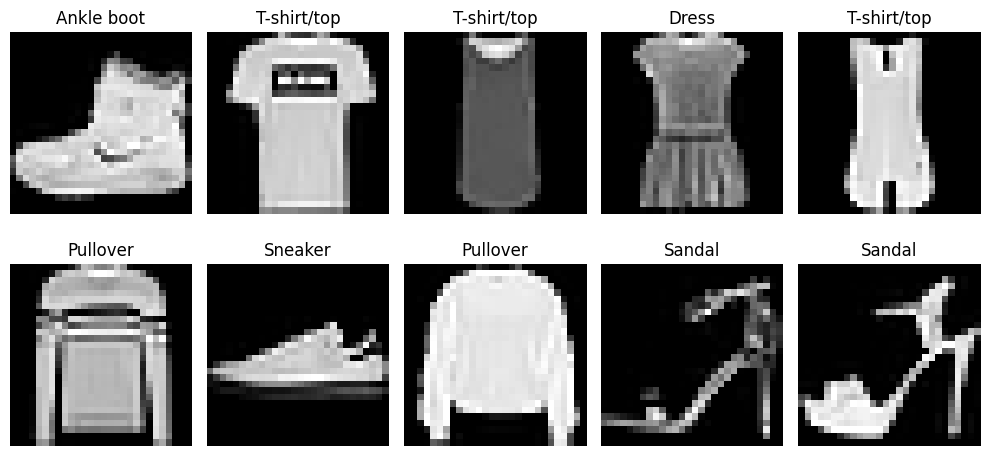

In [2]:
#loading the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# dataset information
print(f"Training set shape: {train_images.shape}, Labels: {train_labels.shape}")
print(f"Test set shape: {test_images.shape}, Labels: {test_labels.shape}")

# defining class names for better readability
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#few sample images with labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


### **Data Preprocessing**

**Normalization:**

The original pixel values in the dataset range from 0 to 255. To improve the performance of the neural network, I will to scale these values to [0,1] by dividing by 255. This helps to speed up training and prevents large input values from dominating learning.


**Reshaping for CNN Input:**

Tensorflow's CNN layers expect images to have a shape of **(height, width, channels)**. Since the images are grayscale, they have only one channel.
I will reshape the data to (28,28,1) so that it can be used with CNN models.

In [3]:
# normalize the images: scaling pixel values to the range [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshaping the images to (28, 28, 1) to include the single channel for CNN input
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#updated shape
print(f"New training set shape: {train_images.shape}")
print(f"New test set shape: {test_images.shape}")


New training set shape: (60000, 28, 28, 1)
New test set shape: (10000, 28, 28, 1)


### **Building the CNN Model**

To classify fashion-MNIST images, I used a convolutional neural network. CNNs are effective for image processing because they capture spatial hierarchies in the data.

**1st convolutional layer:**

Uses ***32 filters*** (small 3×3 sliding windows) to extract simple patterns like edges and textures. Applies ***ReLU activation*** to introduce non-linearity, allowing the network to learn complex features. Takes input of (28,28,1) (grayscale images with 1 channel).

**1st max pooling layer:**

This reduces spatial size of feature maps, keeping important features while lowering computation. Uses a ***2×2 pooling window***, reducing dimensions by half.

**2nd convolutional layer:**

Uses ***64 filters*** for detecting more complex patterns. Again applies ***ReLU activation*** to enhance non-linearity.

**2nd max pooling layer:**

Again reduces spatial dimensions, helping prevent overfitting.

**Flatten layer:**

Converts the ***2D feature maps into a 1D vector*** for feeding into the dense layers.

**Fully connected (dense) layer:**

Has ***128 neurons with ReLU activation***, enabling the model to learn deep patterns.

**Output layer:**

Has ***10 neurons***(one for each class). Uses ***softmax activation***, which converts raw scores into probabilities for classification.


after defining the model, I printed the summary which provides:

- Layer-wise details (filter sizes, activation functions).
- Output shape at each stage.
- Number of trainable parameters.

In [4]:
# defining the CNN model architecture
model = models.Sequential([

    # 1st convolutional layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),

    # 1st pooling layer
    layers.MaxPooling2D(pool_size=(2,2)),

    # 2nd convolutional
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),

    # 2nd pooling
    layers.MaxPooling2D(pool_size=(2,2)),

    # flatten Layer
    layers.Flatten(),

    # fully connected (dense) layer
    layers.Dense(128, activation='relu'),

    # output layer with softmax for classification
    layers.Dense(10, activation='softmax')
])

# model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### **Compiling and Training the Model**

- **The model is compiled with:**

***Adam optimizer*** which dynamically adjusts learning rates for efficient training.

***Sparse categorical crossentropy loss***. This is suitable for multi-class classification with integer labels.

***Accuracy metric***. This measures the percentage of correctly classified images.

- **Training the Model:**

The model is trained for ***10 epochs*** which are full passes over the dataset.

***Batch size of 64*** which processes images in small groups for efficiency.

***Validation data***. Used to monitor model performance during training.

- **Tracking Model Performance:**

The history object stores accuracy and loss values for both training and validation. I will later visualize these trends to assess learning progress.

In [5]:
# compiling the modell
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# training the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7681 - loss: 0.6671 - val_accuracy: 0.8691 - val_loss: 0.3651
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8801 - loss: 0.3325 - val_accuracy: 0.8879 - val_loss: 0.3149
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8958 - loss: 0.2826 - val_accuracy: 0.8980 - val_loss: 0.2849
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9069 - loss: 0.2493 - val_accuracy: 0.9021 - val_loss: 0.2734
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9170 - loss: 0.2218 - val_accuracy: 0.9047 - val_loss: 0.2723
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9266 - loss: 0.1977 - val_accuracy: 0.9041 - val_loss: 0.2847
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9333 - loss: 0.1773 - val_accuracy: 0.9037 - val_loss: 0.2971
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9418 - loss: 0.1571 - val_accuracy: 0

### **Visualizing Model Performance**

- **Training vs. validation accuracy**

This plot shows how well the model is learning over 10 epochs. A small gap between training and validation accuracy is expected. If validation accuracy stagnates or decreases, it could indicate overfitting.


- **Training vs. validation loss**

Loss measures the model's error while training and ideally both training and validation loss should decrease over time. If validation loss starts increasing, it might mean the model is memorizing the training data instead of generalizing which can have problems


- **Overfitting check**

If training accuracy is much higher than validation accuracy, and validation loss is increasing, overfitting is occurring. To address this, I will try to use dropout layers, data augmentation, or reducing model complexity.

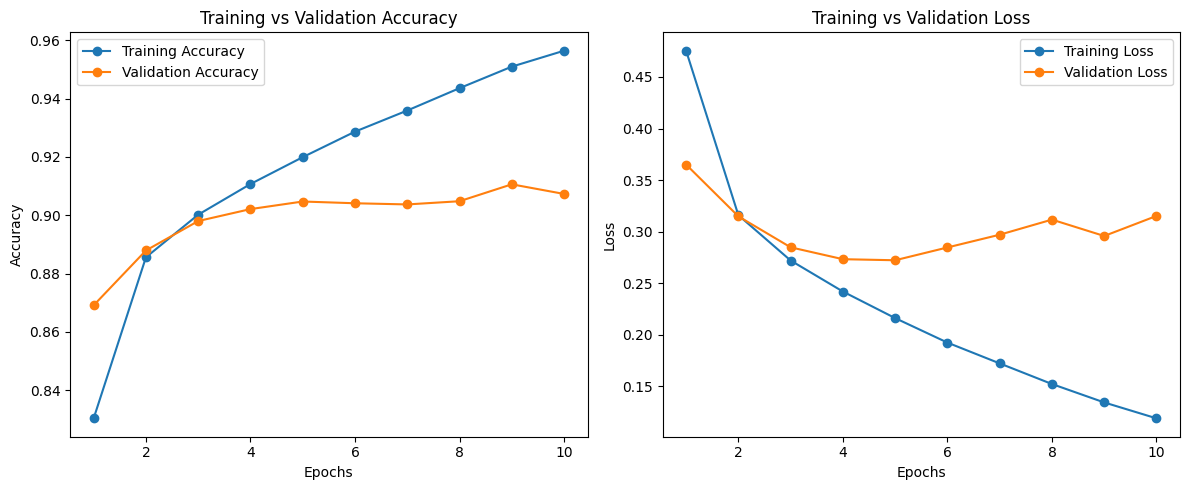

In [6]:
# extracting accuracy and loss values from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, 11), val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# plotting training and validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Interpretation of the graphs:**

- **Accuracy graph:**

The training accuracy keeps improving. The validation accuracy plateaus around 90%, indicating that the model stops generalizing after a few epochs The gap between training and validation accuracy suggests overfitting after about epoch 6.

- **Loss graph:**

Training loss decreases continuously, showing that the model is learning patterns from the training data. Validation loss starts increasing after epoch 5-6, confirming overfitting. This means the model is memorizing training data instead of learning general patterns.

### **Evaluating the Model on Test Data**

Now that the training is complete, I will evaluate the model on unseen test data to measure generalization performance.

I will use the .evaluate() function to compute test accuracy and loss.

Test accuracy measures how well the model performs on new images.

Test loss quantifies the error between predicted and actual labels.

If test accuracy is close to validation accuracy (~90%), it confirms good generalization. If test accuracy is much lower, overfitting might be present, for which I will have to do adjustments.

In [7]:
# evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

#test performance
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9053 - loss: 0.3101
Test Accuracy: 0.9073
Test Loss: 0.3153


Test accuracy, 90.73%, is nearly identical to validation accuracy, 90.73%, meaning the model is performing consistently on unseen data.

Test loss, 0.3153, is close to validation loss, indicating that the model has not significantly overfitted.

Hence there is no immediate need to apply overfitting prevention techniques, as the model is stable.

### **Generating Predictions on Test Data**

Noow that the evaluation is done, I will generate predictions to understand its real world performance.

- The .predict() function will return probability scores for each class.
- I will use np.argmax() to convert probabilities into class labels.
- Then I will visualize 10 sample images from the test set, displaying: The predicted label (model's guess) and the actual label (true class).


**Analyzing correct and incorrect predictions:**

If predictions match actual labels, the model is correctly classifying those samples. If there are mismatches, we can analyze why the model made errors.
This helps identify confusing categories (for example: "shirt" vs. "t-shirt/top").

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


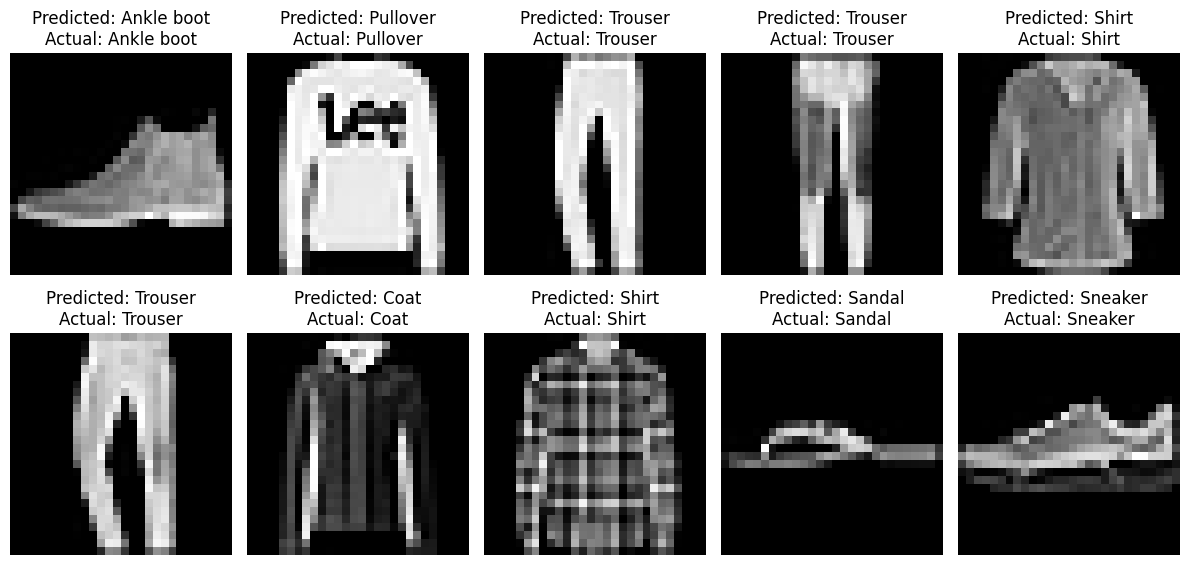

In [8]:
# predictions on the test set
predictions = model.predict(test_images)

#converting the probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# some sample predictions with actual labels
num_samples = 10
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_labels[i]]}\nActual: {class_names[test_labels[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


The model correctly classified all images in the displayed sample. The predicted labels match the actual labels, confirming strong generalization. Since these are random samples, they do not show misclassified examples, but I will investigate them separately below

### **Analyzing Misclassified Examples**

Even though the model achieves 90% accuracy, it still makes errors. Analyzing misclassified samples will help me to understand why and where the model struggles.

- **Identifying misclassified samples:**

I will try to compare predicted labels with actual labels. If the predicted class does not match the true class, it is considered misclassified.

- **Visualizing incorrect predictions:**

Displaying 10 misclassified examples to observe patterns. Some categories might be more confusing for example "shirt" vs. "t-shirt/top".

- **Insights and potential room for improvements:**

If a lot of categories are consistently misclassified, I might consider more training data for those classes, regularization techniques (for example: dropout, data augmentation). Fine-tuning the model with additional layers or hyperparameter adjustments.

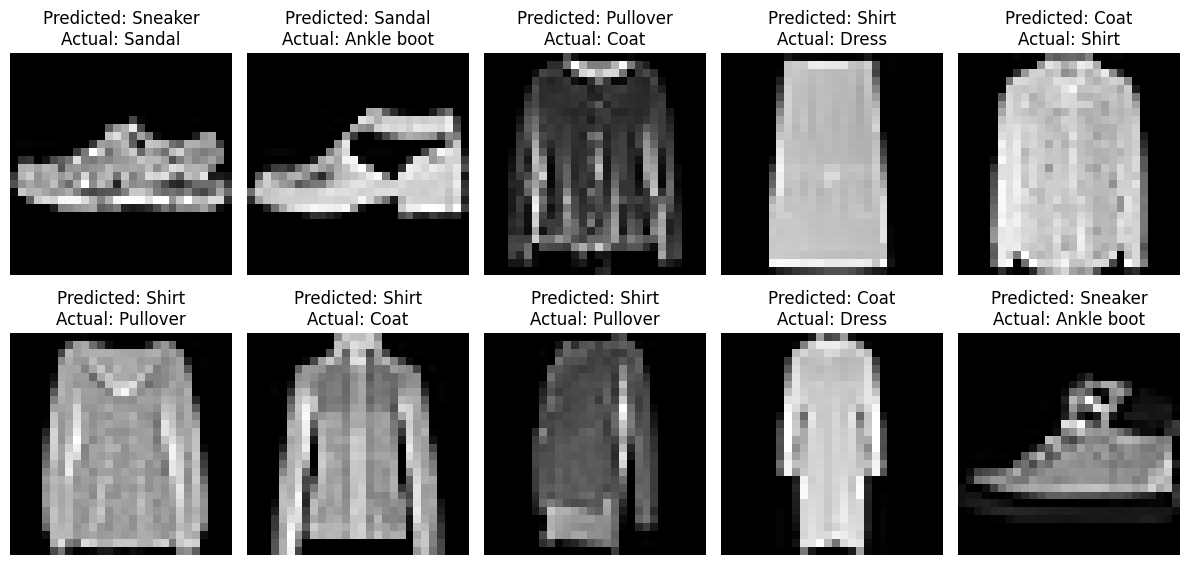

In [9]:
# identifying misclassified images
misclassified_indices = np.where(predicted_labels != test_labels)[0]

# misclassified examples
num_misclassified = 10
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:num_misclassified]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_labels[index]]}\nActual: {class_names[test_labels[index]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


After analyzing the misclassified examples, my observations show that certain categories tend to be confused with one another due to **visual similarities**. For instance, **shirts were often misclassified as coats or pullovers**, likely because these clothing items share similar textures and shapes. Similarly, **sneakers were sometimes mistaken for sandals**, as both have a low-profile structure, making it challenging for the model to differentiate them. Another common misclassification was **dresses being classified as coats**, which may be due to their elongated shape and overlapping visual features. These errors suggest that the model struggles with fine-grained distinctions between similar categories, which is a common challenge in image classification tasks. The misclassifications could be addressed through data augmentation techniques, fine-tuning the model architecture, or enhancing feature extraction layers to improve differentiation between closely related classes.

## **Conclusion:**


This project focused on building a **CNN** to classify images from the **fashion-MNIST dataset**. The goal was to develop a model that could accurately distinguish between different types of clothing and accessories while following a structured deep learning workflow, including **data preprocessing, model training, evaluation, and analysis of results**.

The CNN model was implemented and trained, achieving a **test accuracy of 90.73%**, which closely matches the validation accuracy. This indicates that the model generalizes well to unseen data. Throughout the project, I applied essential **preprocessing steps** like **normalization** and **reshaping**, ensuring the dataset was suitable for training. The chosen model architecture, which included **2 convolutional layers followed by max pooling and fully connected dense layers**, proved to be effective for this classification task.

Training progress was monitored using **accuracy** and **loss curves**, which showed steady improvement in training accuracy but also **indicated some overfitting beyond epoch 6**. Evaluating the model on test data confirmed its strong performance, and analyzing predictions helped identify common misclassification patterns. The model occasionally struggled with visually similar categories, such as **shirts vs. coats and sneakers vs. sandals**, which suggests areas for further improvement.

While the model performed well, there are several ways it could be improved. **data augmentation** could help introduce more variations in the dataset, reducing overfitting. Adding **dropout layers** or **batch normalization** could also improve generalization. Additionally, experimenting with **deeper architectures or transfer learning** could further enhance classification accuracy.